In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
from imp import reload
import h5py

In [3]:
import deltascope as cranium
import deltascope.alignment as ut 

In [4]:
at = ".\data\hss1a\AT\Prob"
gfap = ".\data\hss1a\GFAP\Prob"
root = ".\data\hss1a"

In [5]:
outdir = os.path.join(root,'Output-02-15-2019')
os.mkdir(outdir)

In [6]:
Dat = {}
for f in os.listdir(at):
    if 'h5' in f:
        num  = re.findall(r'\d+',f.split('.')[0])[-1]
        Dat[num] = os.path.join(at,f)

In [7]:
Dzrf = {}
for f in os.listdir(gfap):
    if 'h5' in f:
        num  = re.findall(r'\d+',f.split('.')[0])[-1]
        Dzrf[num] = os.path.join(gfap,f)

In [8]:
Dbat = {}
Dbzrf = {}

# Data Processing

In [9]:
klist = Dat.keys()

In [10]:
param = {
    'gthresh':0.5,
    'scale':[1,1,1],
    'microns':[0.16,0.16,0.21],
    'mthresh':0.5,
    'radius':10,
    'comp_order':[0,2,1],
    'fit_dim':['x','z'],
    'deg':2
}

In [11]:
%%time
for k in klist:
    if k not in list(Dbat.keys()):
        Dbat[k] = ut.preprocess(Dat[k],param)
        Dbzrf[k] = ut.preprocess(Dzrf[k],param,pca=Dbat[k].pcamed,mm=Dbat[k].mm,vertex=Dbat[k].vertex)
        #Dbcaax[k] = ut.preprocess(Dcaax[k],param,pca=Dbat[k].pcamed,mm=Dbat[k].mm,vertex=Dbat[k].vertex)
        print(k)
    else:
        print(k,'already processed')

C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


02


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


04


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


06


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


10


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


11


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


13


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


16


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


17


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


18


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


20


C:\Users\zfishlab\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


6
Wall time: 7min 39s


# Functions

In [12]:
def start(k):
    return(ut.start(k,Dbat,[Dbzrf],im=True))
def save_both(k,dfa,dfb):
    ut.save_both(k,dfa,dfb,outdir,'hss1a')

In [13]:
model = pd.DataFrame({'a':[],'b':[],'c':[]})
def save_model(k,mm,model):
    row = pd.Series({'a':mm[0],'b':mm[1],'c':mm[2]},name=k)
    model = model.append(row)
    return(model)

In [14]:
def fit_model(axi,df,mm=None):
    if mm == None:
        mm = np.polyfit(df.x,df.z,2)
    p = np.poly1d(mm)
    xrange = np.arange(np.min(df.x),np.max(df.x))
    axi.plot(xrange,p(xrange),c='m')
    return(mm)

In [15]:
def pick_pts(x1,z1,vx,vz,x2,z2):
    pts = pd.DataFrame({'x':[x1,vx,x2],'z':[z1,vz,z2]})
    return(pts)

# 06

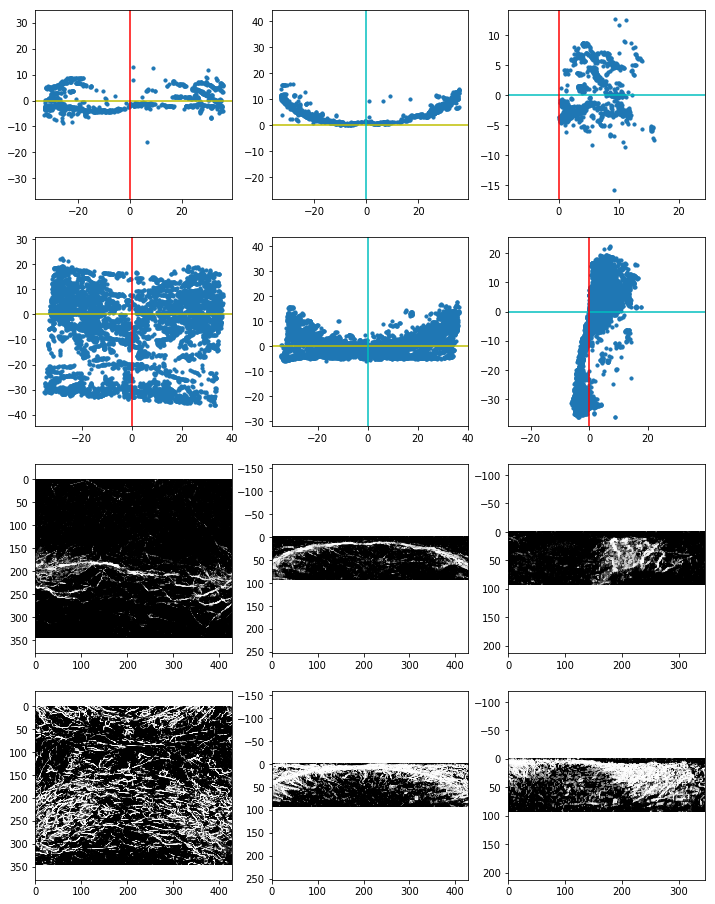

In [16]:
k,df,Ldf,ax = start('06')

In [17]:
k = '206'

In [18]:
mm = fit_model(ax[0,1],df)

In [19]:
model = save_model(k,mm,model)
save_both(k,df,Ldf[0])

Write to .\data\hss1a\Output-02-15-2019\AT_206_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_206_hss1a.psi complete


# 20

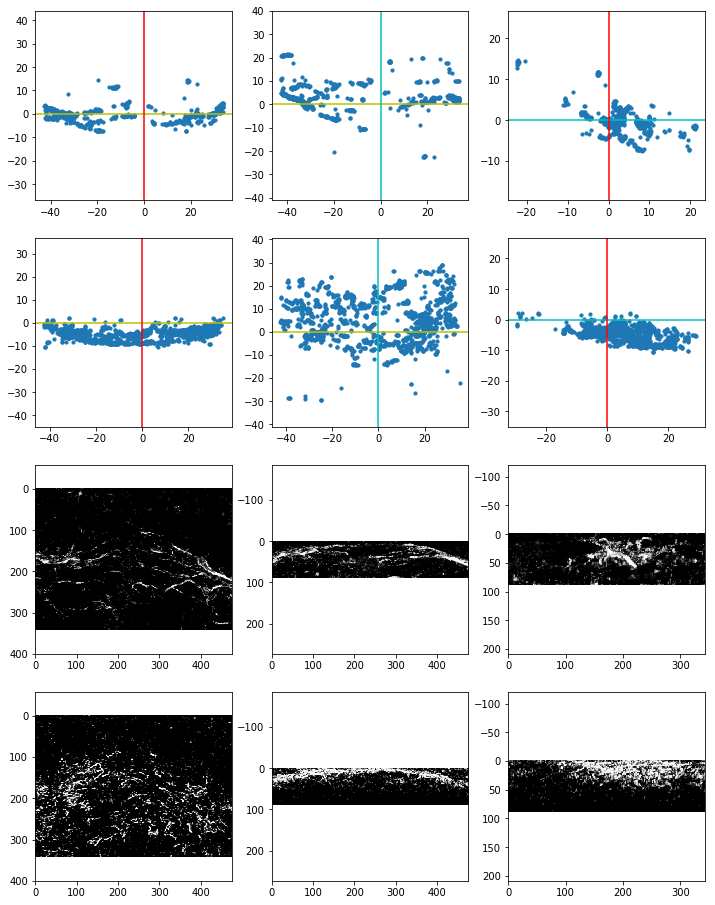

In [20]:
k,df,Ldf,ax = start('20')

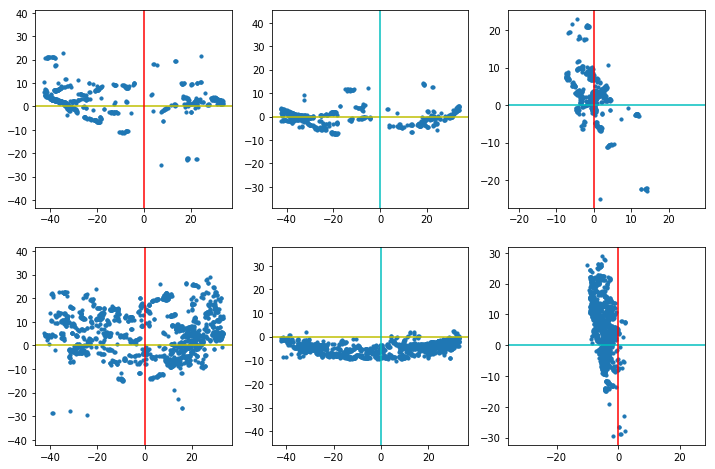

In [21]:
df1,Ldf1 = ut.zyswitch(df,Ldf)
ax = ut.make_graph([df1]+Ldf1)

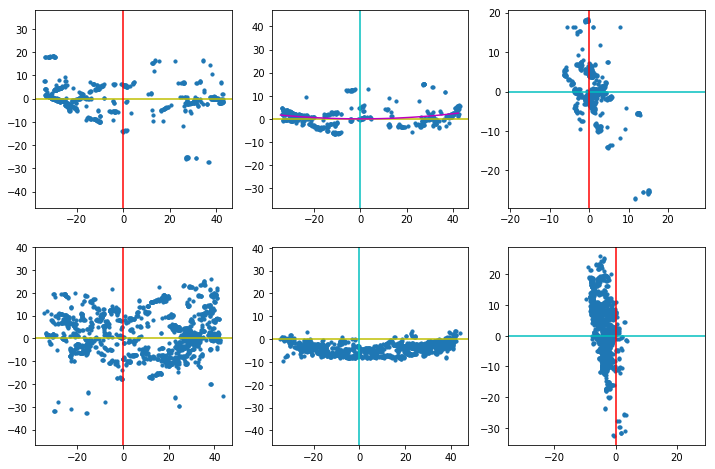

In [22]:
df2,Ldf2,mm,ax = ut.ch_vertex(df1,Ldf1)

In [23]:
pts = pick_pts(-36,3,0,-5,42,4)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

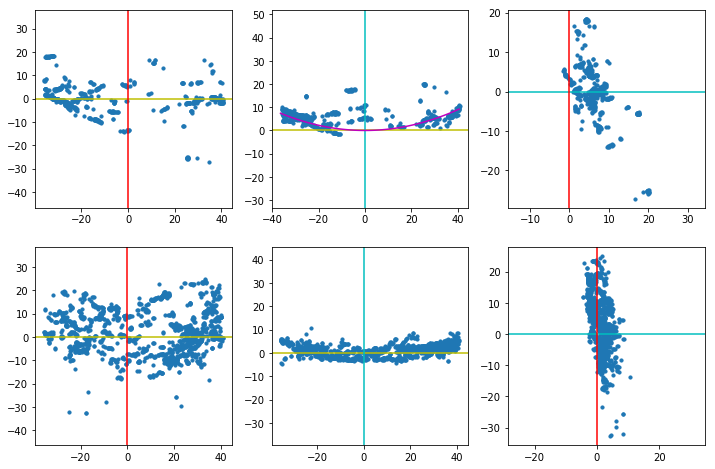

In [24]:
df3,Ldf3,mm,ax = ut.ch_vertex(df2,Ldf2,pts=pts)

In [25]:
model = save_model(k,mm,model)
save_both(k,df3,Ldf3[0])

Write to .\data\hss1a\Output-02-15-2019\AT_20_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_20_hss1a.psi complete


# 17

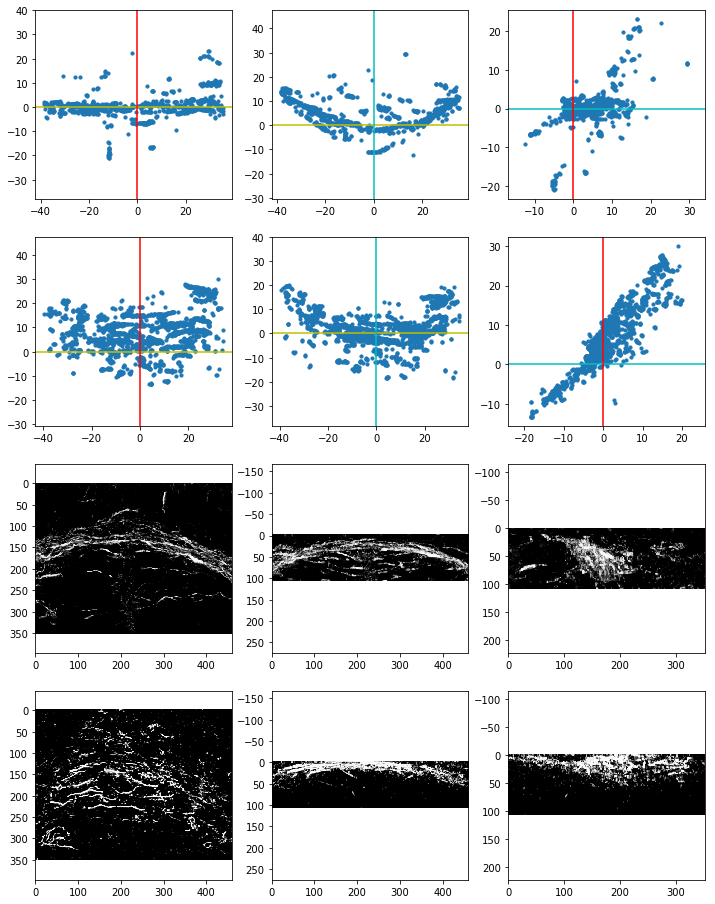

In [26]:
k,df,Ldf,ax = start('17')

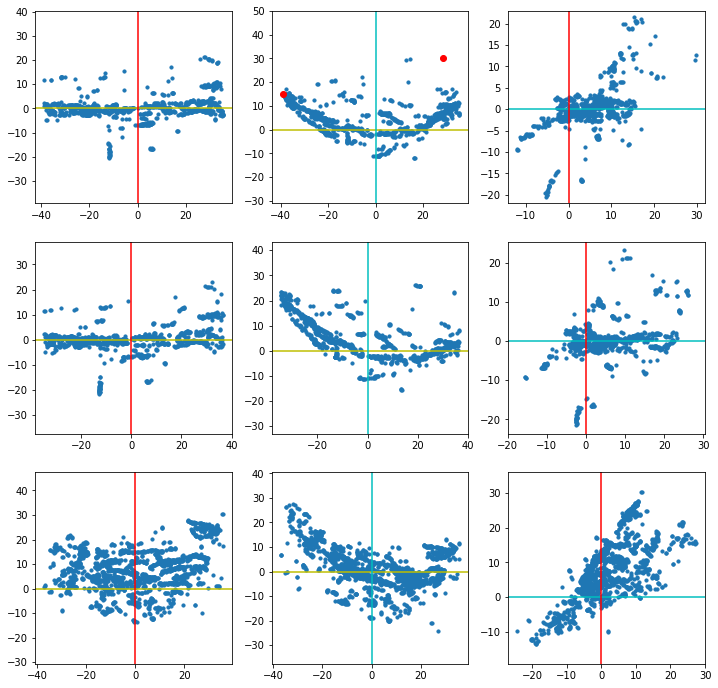

In [27]:
df1,Ldf1,pts,ax = ut.check_pts(df,Ldf,'z')

In [28]:
pts.iloc[0].x = 35
pts.iloc[0].z = 10
ax[0,1].scatter(pts.x,pts.z,c='y')
pts

,x,z
0,35.000000,10.000000
1,-38.831946,15.116733


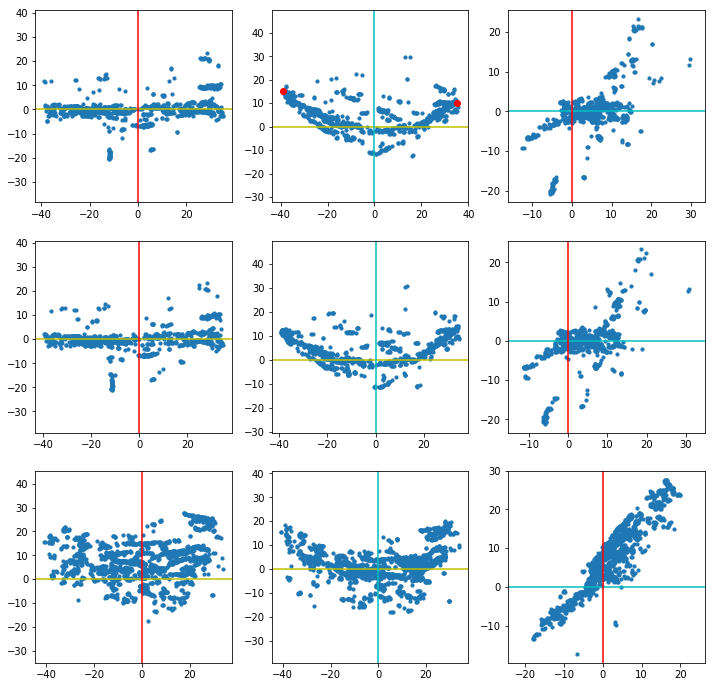

In [29]:
df2,Ldf2,ax = ut.revise_pts(df,Ldf,'z',pts=pts)

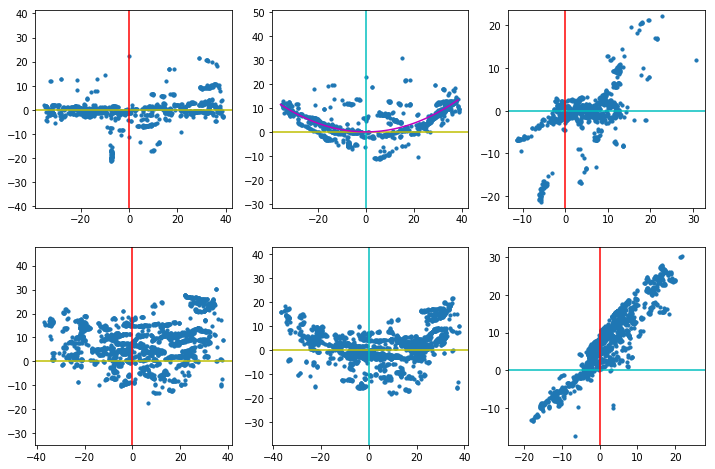

In [30]:
df3,Ldf3,mm,ax = ut.ch_vertex(df2,Ldf2)

In [31]:
pts = pick_pts(-36,13,0,-4,38,13)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

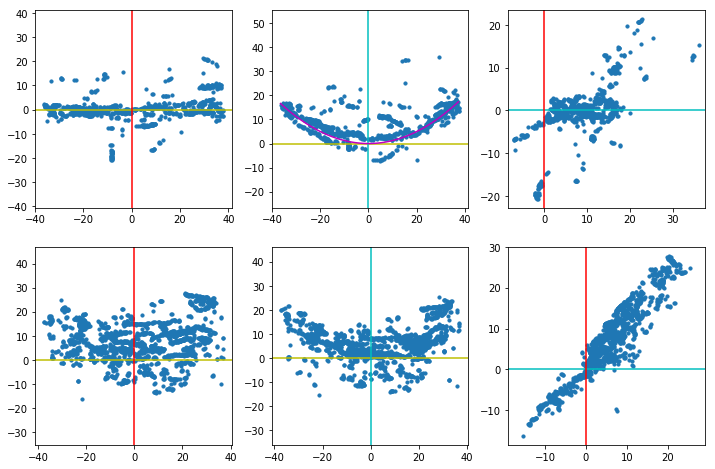

In [32]:
df4,Ldf4,mm,ax = ut.ch_vertex(df3,Ldf3,pts=pts)

In [33]:
model = save_model(k,mm,model)
save_both(k,df4,Ldf4[0])

Write to .\data\hss1a\Output-02-15-2019\AT_17_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_17_hss1a.psi complete


# 13

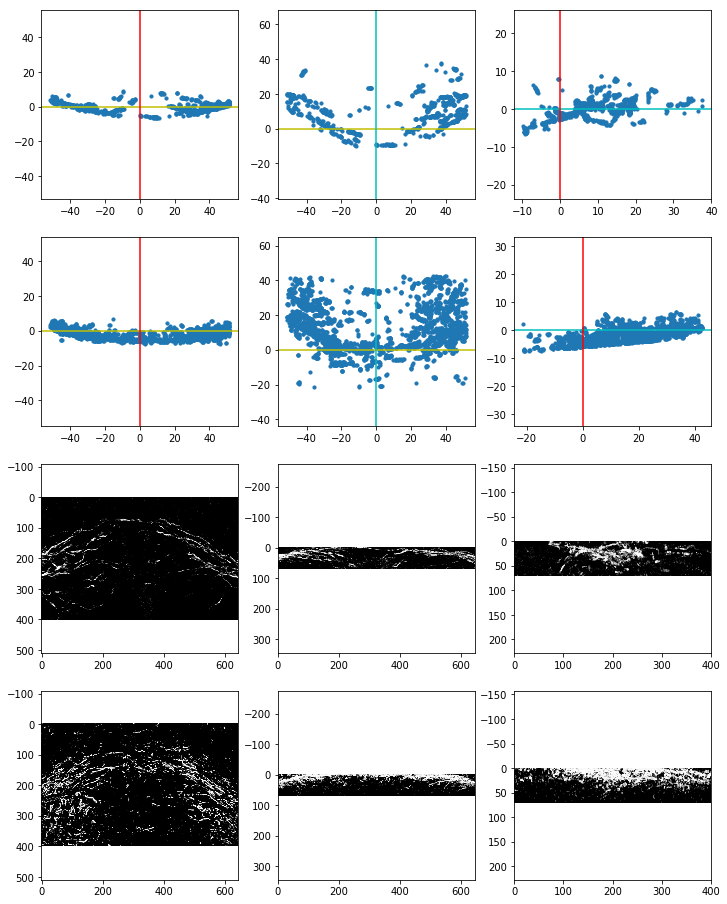

In [34]:
k,df,Ldf,ax = start('13')

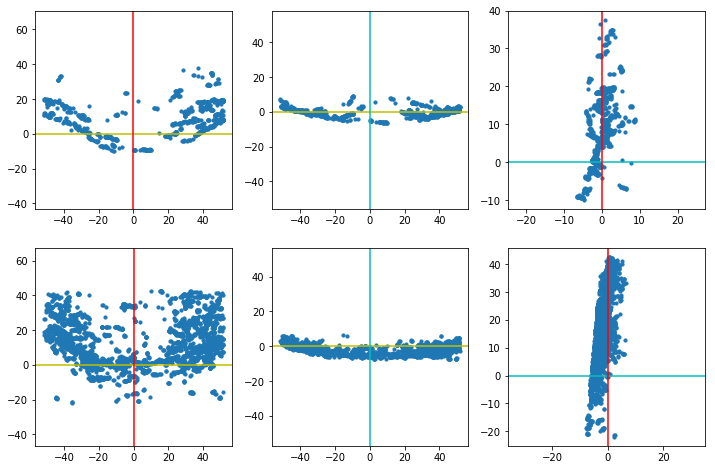

In [35]:
df1,Ldf1 = ut.zyswitch(df,Ldf)
ax = ut.make_graph([df1]+Ldf1)

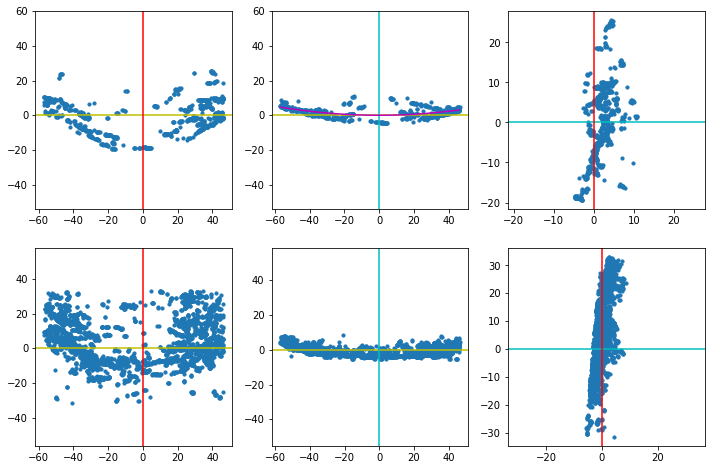

In [36]:
df2,Ldf2,mm,ax = ut.ch_vertex(df1,Ldf1)

In [37]:
pts = pick_pts(-55,5,0,-3,55,5)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

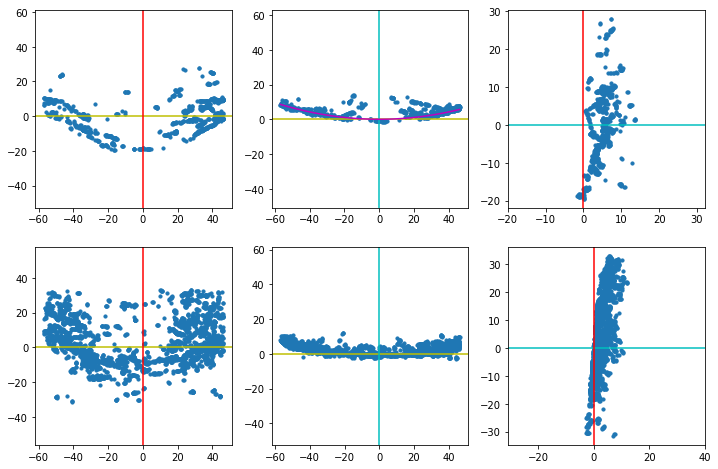

In [38]:
df3,Ldf3,mm,ax = ut.ch_vertex(df2,Ldf2,pts=pts)

In [39]:
model = save_model(k,mm,model)
save_both(k,df3,Ldf3[0])

Write to .\data\hss1a\Output-02-15-2019\AT_13_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_13_hss1a.psi complete


In [40]:
klist

dict_keys(['02', '04', '06', '10', '11', '13', '16', '17', '18', '20', '6'])

# 6

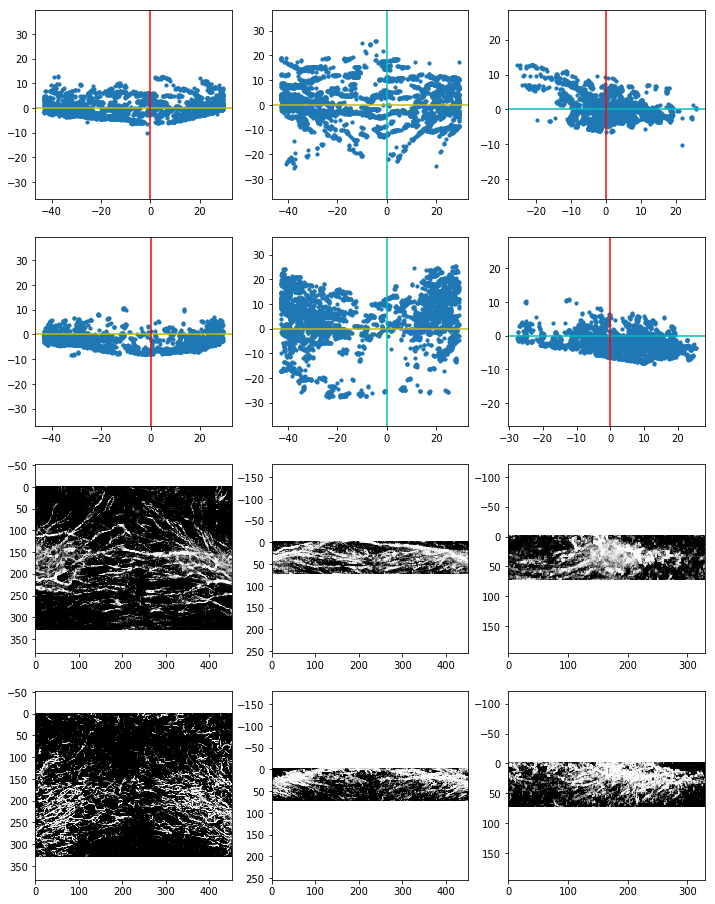

In [41]:
k,df,Ldf,ax = start('6')

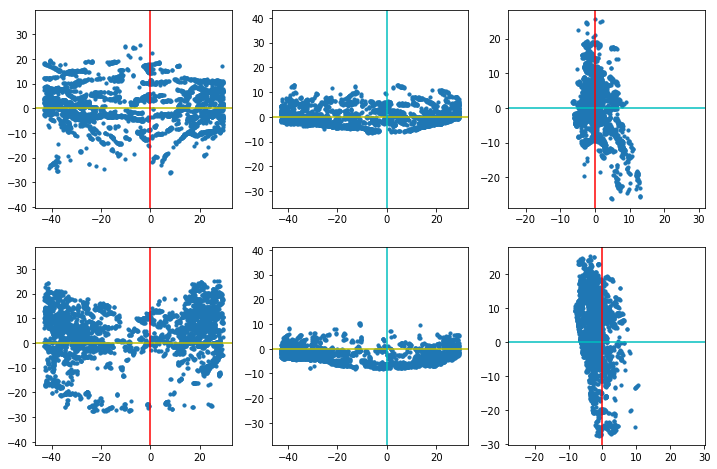

In [42]:
df1,Ldf1 = ut.zyswitch(df,Ldf)
ax = ut.make_graph([df1]+Ldf1)

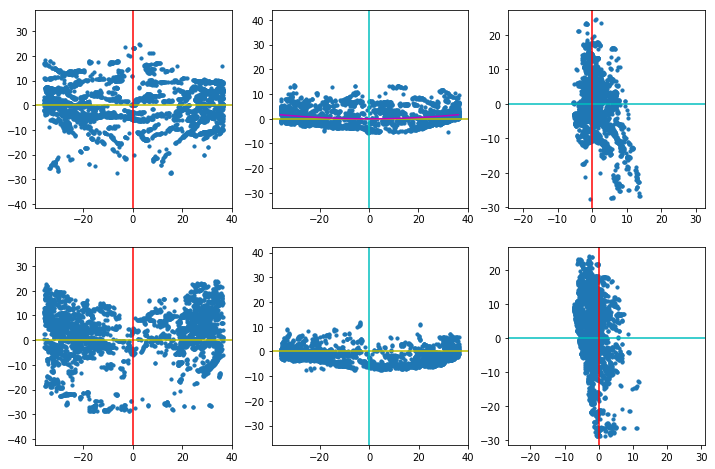

In [43]:
df2,Ldf2,mm,ax = ut.ch_vertex(df1,Ldf1)

In [44]:
model = save_model(k,mm,model)
save_both(k,df2,Ldf2[0])

Write to .\data\hss1a\Output-02-15-2019\AT_6_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_6_hss1a.psi complete


# 10

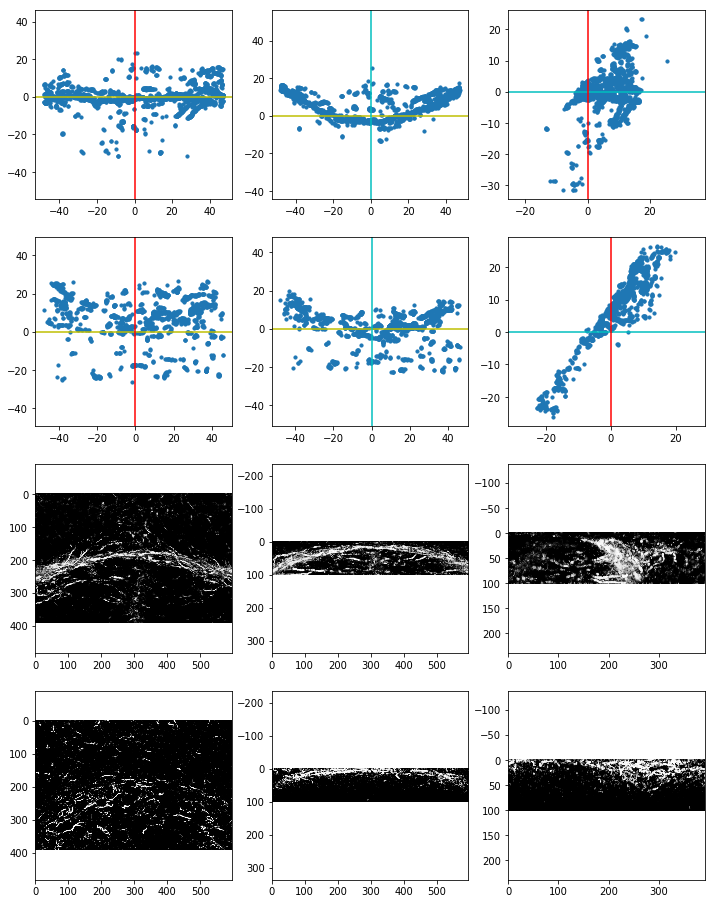

In [45]:
k,df,Ldf,ax = start('10')

In [46]:
mm = fit_model(ax[0,1],df)

In [47]:
pts = pick_pts(-48,15,0,-4,45,13)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

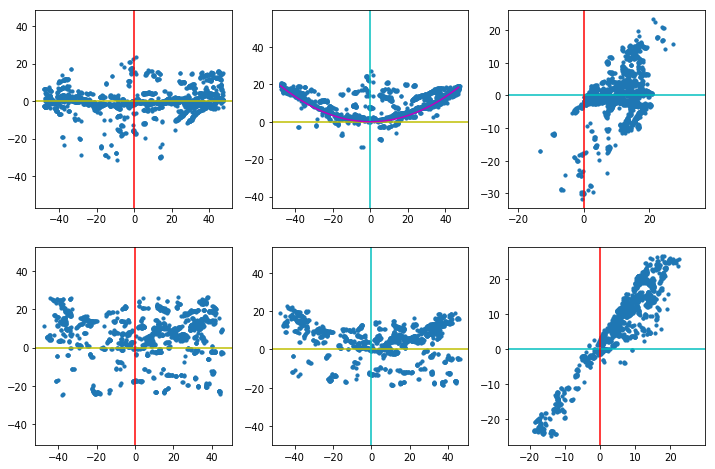

In [48]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [49]:
model = save_model(k,mm,model)
save_both(k,df1,Ldf1[0])

Write to .\data\hss1a\Output-02-15-2019\AT_10_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_10_hss1a.psi complete


# 04

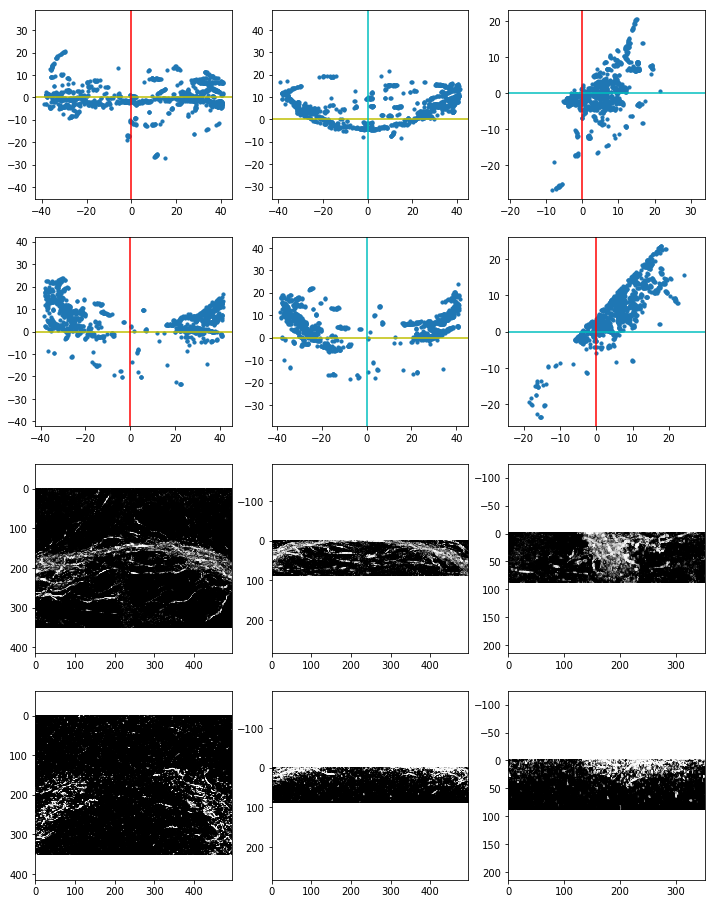

In [50]:
k,df,Ldf,ax = start('04')

In [51]:
k = '204'

In [52]:
pts = pick_pts(-36,11,0,-3,40,12)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

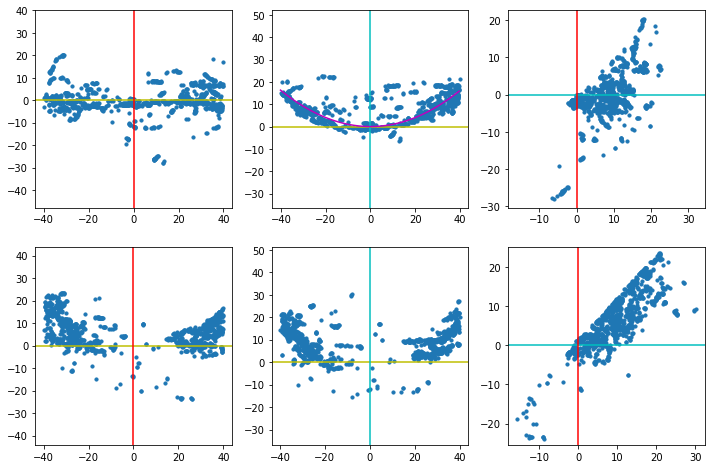

In [53]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [54]:
model = save_model(k,mm,model)
save_both(k,df1,Ldf1[0])

Write to .\data\hss1a\Output-02-15-2019\AT_204_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_204_hss1a.psi complete


# 18

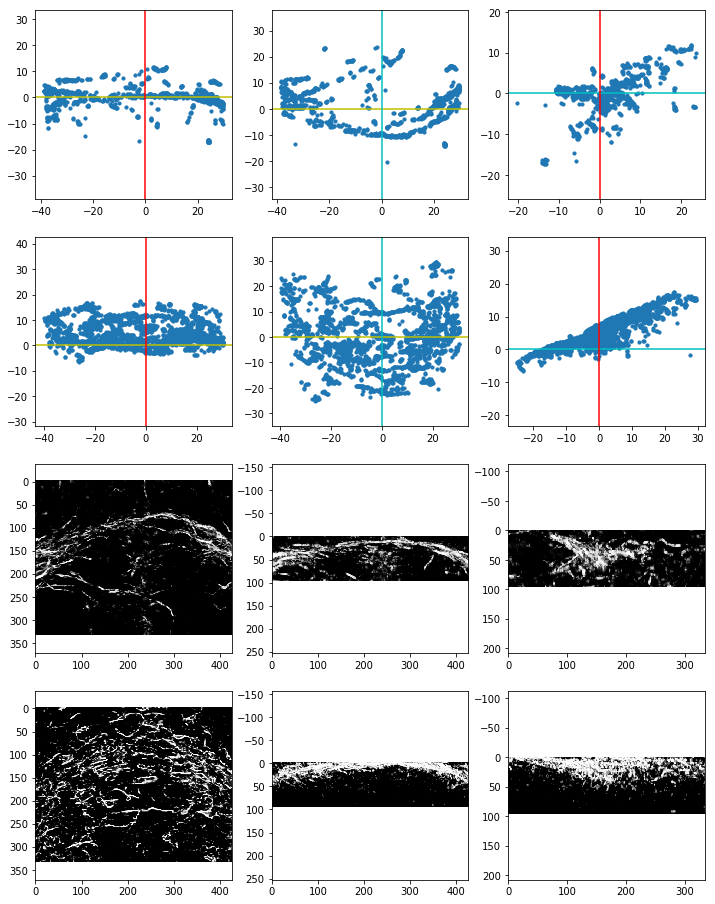

In [55]:
k,df,Ldf,ax = start('18')

In [56]:
pts = pick_pts(-36,5,-4,-8,30,4)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

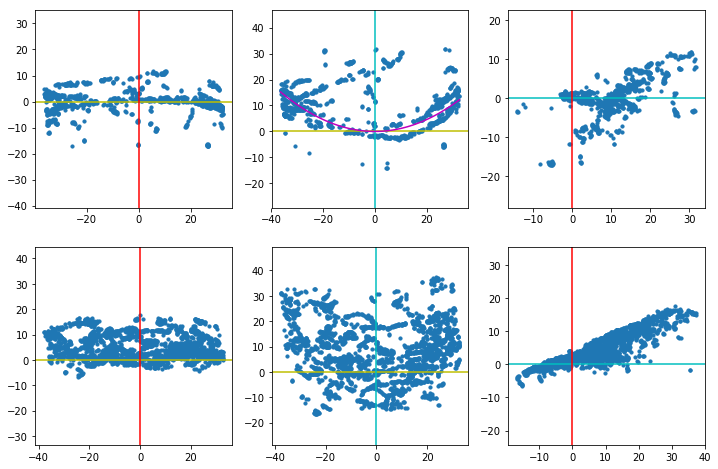

In [57]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [58]:
model = save_model(k,mm,model)
save_both(k,df1,Ldf1[0])

Write to .\data\hss1a\Output-02-15-2019\AT_18_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_18_hss1a.psi complete


# 11

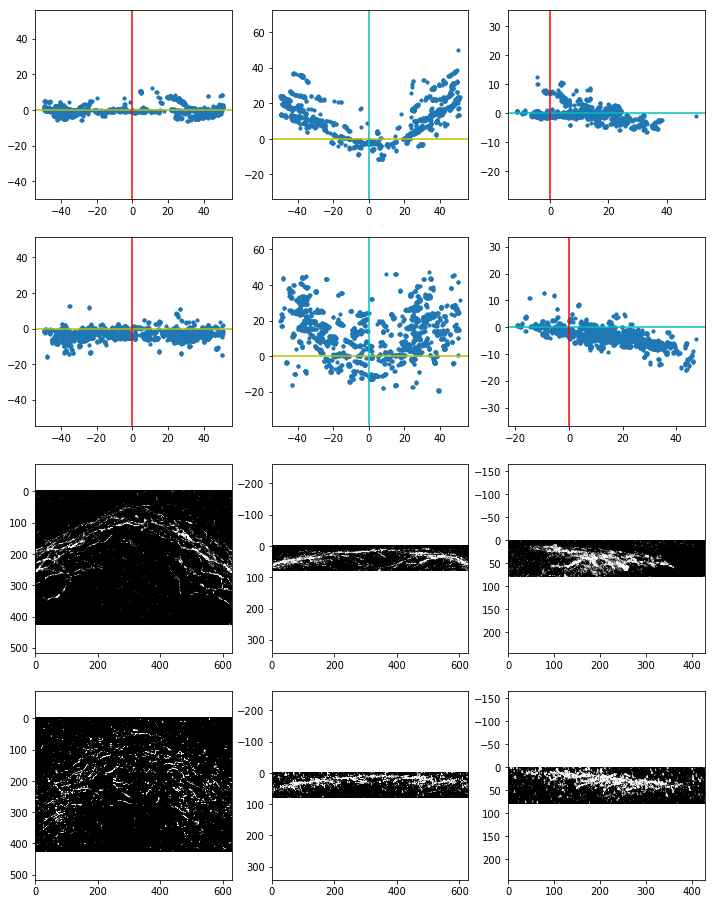

In [59]:
k,df,Ldf,ax = start('11')

In [60]:
mm = fit_model(ax[0,1],df)

In [61]:
pts = pick_pts(-50,20,0,-3,47,22)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

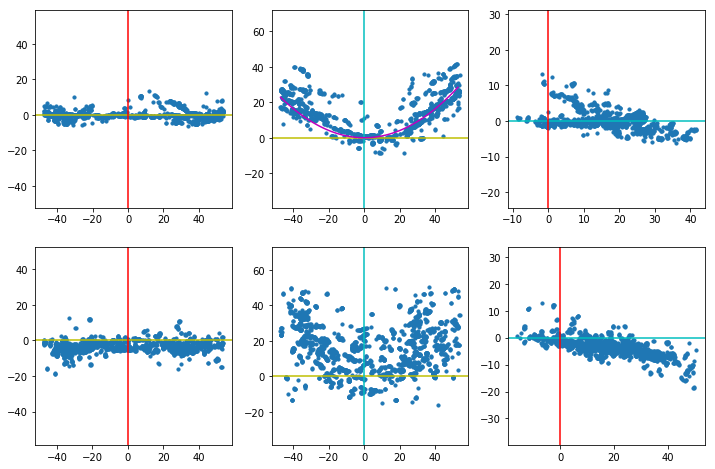

In [62]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [63]:
model = save_model(k,mm,model)
save_both(k,df1,Ldf1[0])

Write to .\data\hss1a\Output-02-15-2019\AT_11_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_11_hss1a.psi complete


# 02

Discard due to minimal signal

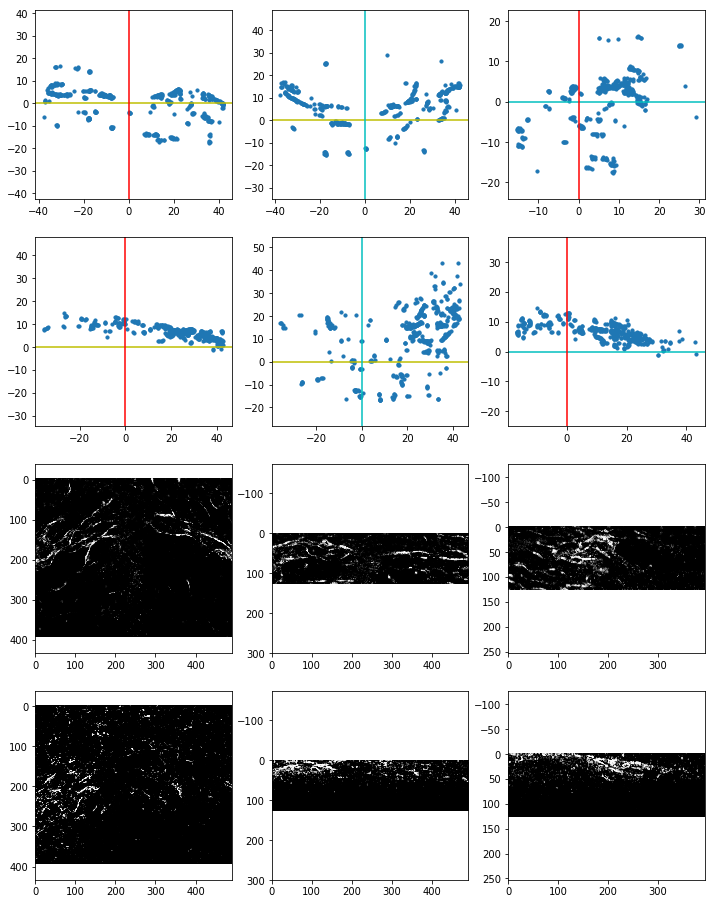

In [64]:
k,df,Ldf,ax = start('02')

# 16

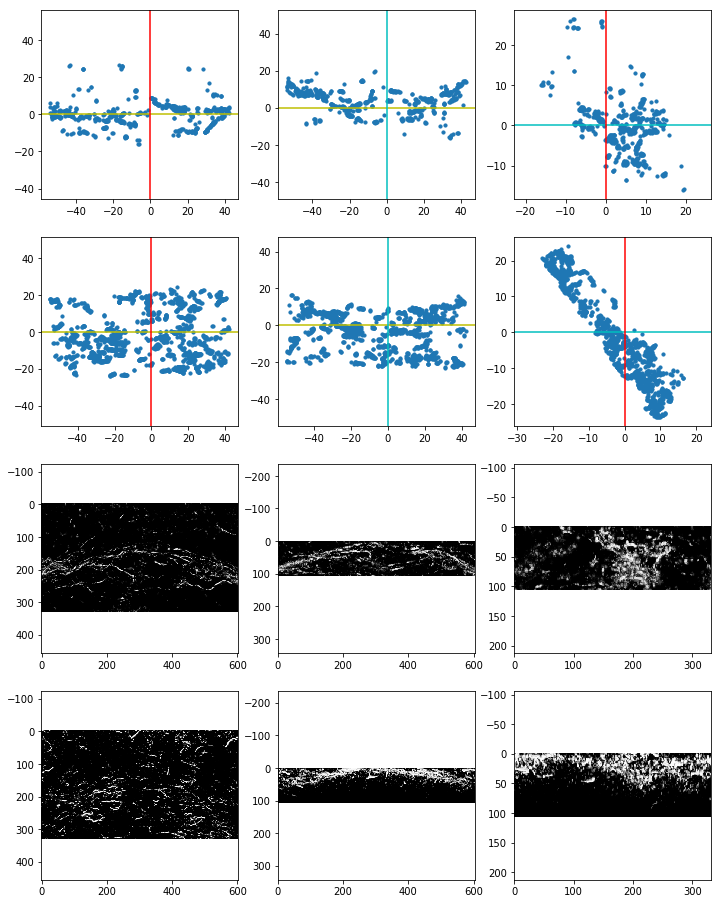

In [65]:
k,df,Ldf,ax = start('16')

In [66]:
pts = pick_pts(-55,12,0,-4,45,9)
ax[0,1].scatter(pts.x,pts.z,c='m',s=50)

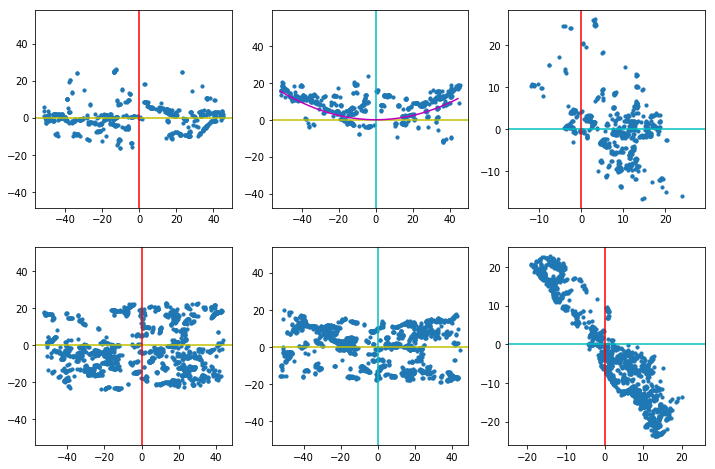

In [67]:
df1,Ldf1,mm,ax = ut.ch_vertex(df,Ldf,pts=pts)

In [68]:
model = save_model(k,mm,model)
save_both(k,df1,Ldf1[0])

Write to .\data\hss1a\Output-02-15-2019\AT_16_hss1a.psi complete
Write to .\data\hss1a\Output-02-15-2019\ZRF_16_hss1a.psi complete


# Model

In [69]:
model

,a,b,c
206,0.009004,-7.692383e-16,2.466602e-14
20,0.005596,-5.923234e-17,2.030734e-16
17,0.012427,-1.431835e-17,-2.051165e-15
13,0.002645,8.904206e-18,-5.127900e-16
6,0.001270,-1.309015e-17,-1.570219e-15
10,0.008318,2.484148e-17,-6.089154e-15
204,0.010051,5.331685e-17,-1.132164e-15
18,0.011503,1.011939e-16,-3.913462e-15
11,0.010226,1.645257e-17,1.023585e-14
16,0.005798,-5.794203e-17,4.770577e-15


In [70]:
model.to_csv(os.path.join(outdir,'model.csv'))